# Card Probabilities

A notebook to look at the probabilities of certain phemomena when working with a fairly-shuffled deck of cards.

Prerequisites below - imports, and creation of a deck of cards (plus suits and cards to allow creation of random cards and hands later on)

In [70]:
from random import randint, choice
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import numpy as np
import random

suits = ['D', 'H', 'C', 'S']
cards = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
deck = [suit + card for suit in suits for card in cards]

### Shuffle

Next, a shuffle function.  This function is designed to imitate a riffle shuffle - the card deck is cut (somewhere around the middle), and then interleaved.  Any remaining cards from the bigger side of the cut are stacked on top of the deck.  Usually multiple shuffles would be carried out - particularly from an initially created deck.

In [3]:
def shuffle(deck, limit=20):
    split = randint(limit, len(deck)-limit)
    deck_1 = deck[:split]
    deck_2 = deck[split:]
    new_deck = []
    for i in range(min(len(deck_1), len(deck_2))):
        new_deck.append(deck_1[i])
        new_deck.append(deck_2[i])
    if len(deck_1) < len(deck_2):
        for i in range(len(deck_1), len(deck_2)):
            new_deck.append(deck_2[i])
    else:
        for i in range(len(deck_2), len(deck_1)):
            new_deck.append(deck_1[i])
    return new_deck

### Guessing at Random
First, the probability of guessing a card correctly at random.  Each time a card is drawn, a random guess is made, and compared to the deck; a correct guess is marked as a positive, and the number of correct guesses per hand is stored.  This is run a number of times, set by 'iterations'

In [30]:
current_deck = deck
results = []
iterations = 100000
for i in range(iterations):
    positives = 0
    negatives = 0
    current_deck = shuffle(current_deck)
    for card in range(len(deck)):
        guess = choice(suits) + choice(cards)
        if guess == current_deck[card]:
            positives += 1
        else:
            negatives += 1
    current_result = positives
    results.append(current_result)

### Graphing

The results generated above are plotted to visualise the distribution of probabilities of number of cards guessed correctly.

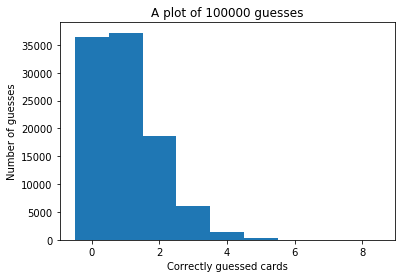

In [31]:
plt.hist(results, bins=9, range=(0,9), align='left')
plt.xlabel('Correctly guessed cards')
plt.ylabel('Number of guesses')
plt.title(f'A plot of {iterations} guesses');

In [56]:
results_table=[[i, results.count(i), f'{(100 * (results.count(i)/iterations)):.2f}%'] for i in range(9)]
results_table.insert(0,['Cards Drawn','Number','Percentage'])
display(HTML(tabulate.tabulate(results_table, tablefmt='html')))

Cards Drawn,Number,Percentage
0,36405,36.41%
1,37207,37.21%
2,18576,18.58%
3,5995,6.00%
4,1487,1.49%
5,281,0.28%
6,40,0.04%
7,8,0.01%
8,1,0.00%


In [59]:
np.mean(results)

1.00001

## Card Counting Guesser
This method remembers the previous cards which have been seen in the house deck, and guesses accordingly.

In [85]:
current_deck = deck
results = []
iterations = 10000
for i in range(iterations):
    positives = 0
    negatives = 0
    current_deck = shuffle(current_deck)
    guessed_already = []
    for card in range(len(deck)):
        guess = choice(suits) + choice(cards)
        while guess in guessed_already:
            guess = choice(suits) + choice(cards)
        if guess == current_deck[card]:
            positives += 1
        else:
            negatives += 1
        guessed_already.append(current_deck[card])
    current_result = positives
    results.append(current_result)

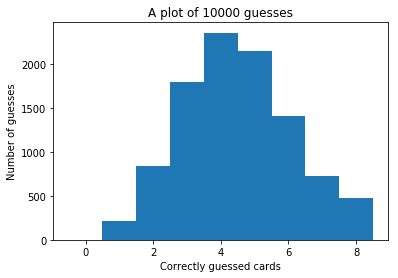

In [86]:
plt.hist(results, bins=9, range=(0,9), align='left')
plt.xlabel('Correctly guessed cards')
plt.ylabel('Number of guesses')
plt.title(f'A plot of {iterations} guesses');

In [87]:
results_table=[[i, results.count(i), f'{(100 * (results.count(i)/iterations)):.2f}%'] for i in range(9)]
results_table.insert(0,['Cards Drawn','Number','Percentage'])
display(HTML(tabulate.tabulate(results_table, tablefmt='html')))

Cards Drawn,Number,Percentage
0,0,0.00%
1,215,2.15%
2,835,8.35%
3,1791,17.91%
4,2356,23.56%
5,2152,21.52%
6,1405,14.05%
7,726,7.26%
8,325,3.25%


In [88]:
np.mean(results)

4.5377

## Imperfect Card Counting Guesser
The previous version remembers the house cards perfectly.  Adding a degree of forgetfulness to this will make it somewhat more realistic.  The controlling variable is called 'remembering', and is scaled from 0 > 1

In [92]:
current_deck = deck
results = []
iterations = 10000
remembering = 0.25
for i in range(iterations):
    positives = 0
    negatives = 0
    current_deck = shuffle(current_deck)
    guessed_already = []
    for card in range(len(deck)):
        guess = choice(suits) + choice(cards)
        while guess in guessed_already:
            guess = choice(suits) + choice(cards)
        if guess == current_deck[card]:
            positives += 1
        else:
            negatives += 1
        if random.random() < remembering:
            guessed_already.append(current_deck[card])
    current_result = positives
    results.append(current_result)

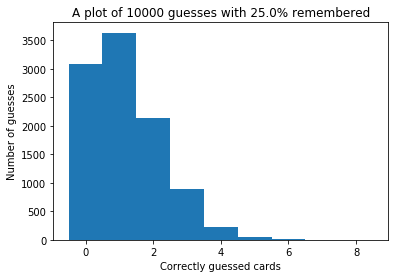

In [93]:
plt.hist(results, bins=9, range=(0,9), align='left')
plt.xlabel('Correctly guessed cards')
plt.ylabel('Number of guesses')
plt.title(f'A plot of {iterations} guesses with {remembering*100}% remembered');

In [95]:
results_table=[[i, results.count(i), f'{(100 * (results.count(i)/iterations)):.2f}%'] for i in range(9)]
results_table.insert(0,['Cards Drawn','Number','Percentage'])
display(HTML(tabulate.tabulate(results_table, tablefmt='html')))

Cards Drawn,Number,Percentage
0,3081,30.81%
1,3633,36.33%
2,2129,21.29%
3,888,8.88%
4,216,2.16%
5,47,0.47%
6,6,0.06%
7,0,0.00%
8,0,0.00%
